In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import joblib

In [2]:
df=pd.read_csv(r"C:\Users\anush\OneDrive\Desktop\Data Analytics Internship\Iris Classification\Iris.csv")

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]  

In [5]:
df.rename(columns={'species': 'species'}, inplace=True)

In [14]:
print(df.columns.tolist())

['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm', 'speciesencoded']


In [15]:
print("Species categories:", df['speciesencoded'].unique())

Species categories: [0 1 2]


In [16]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,speciesencoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
print(df.describe())

       sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm  \
count     150.000000    150.000000     150.000000    150.000000   
mean        5.843333      3.054000       3.758667      1.198667   
std         0.828066      0.433594       1.764420      0.763161   
min         4.300000      2.000000       1.000000      0.100000   
25%         5.100000      2.800000       1.600000      0.300000   
50%         5.800000      3.000000       4.350000      1.300000   
75%         6.400000      3.300000       5.100000      1.800000   
max         7.900000      4.400000       6.900000      2.500000   

       speciesencoded  
count      150.000000  
mean         1.000000  
std          0.819232  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          2.000000  
max          2.000000  


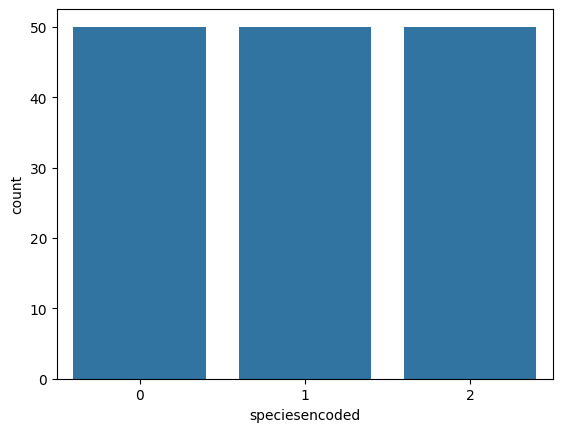

In [18]:
sns.countplot(x='speciesencoded', data=df)
plt.show()

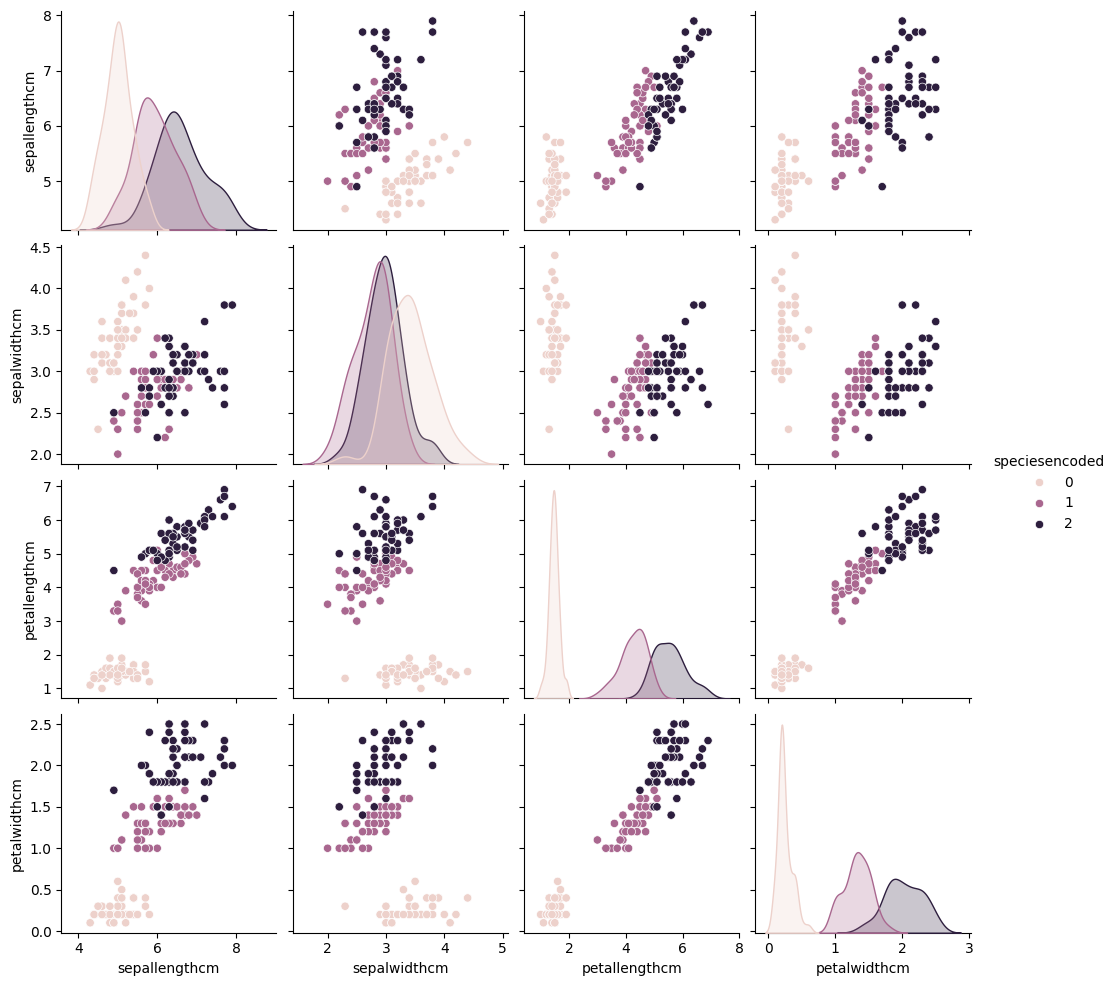

In [19]:
sns.pairplot(df, hue='speciesencoded')
plt.show()

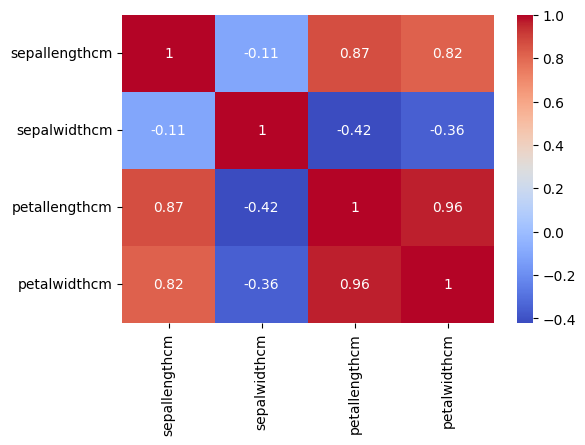

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [11]:
df['speciesencoded']=le.fit_transform(df['species'])

In [12]:
df=df.drop(columns='species',axis=1)

In [13]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,speciesencoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df.shape

(150, 5)

In [23]:
x=df.drop(columns='speciesencoded')
y=df['speciesencoded']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
scaler = StandardScaler()

In [26]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

In [28]:
results = {}

In [29]:
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)

results

Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
--------------------------------------------------
Model: KNN
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion M

{'Logistic Regression': 1.0,
 'KNN': 1.0,
 'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'SVM': 1.0}

In [30]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [31]:
joblib.dump(best_model, 'iris_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [32]:
print(f"Best model saved: {best_model_name}")

Best model saved: Logistic Regression
